In [1]:
import numpy as np
import pandas as pd
import jscatter
import h5py
import os
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import logomaker

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/cavpor_dnazoo/modisco_seqlet_occurences/macrophage"
data_path = os.path.join(data_dir, "occurences_annotated.tsv")
names_path = os.path.join(data_dir, "seqlet_names.txt")

In [3]:
data = pd.read_csv(data_path, sep='\t', header=0)
data

,chr_x,start_x,end_x,1,2_x,3_x,4_x,5_x,6_x,summit_x,...,xs.pos.pattern_21,xs.pos.pattern_22,xs.pos.pattern_23,xs.pos.pattern_3,xs.pos.pattern_4,xs.pos.pattern_5,xs.pos.pattern_6,xs.pos.pattern_7,xs.pos.pattern_8,xs.pos.pattern_9
0,HiC_scaffold_1,127994,129254,total_peak_4a,103,.,3.31299,10.37330,7.94158,125,...,0,0,0,0,0,0,0,0,0,0
1,HiC_scaffold_1,127994,129254,total_peak_4b,1515,.,15.80100,151.57800,147.29000,441,...,0,0,0,2,0,0,0,0,0,0
2,HiC_scaffold_1,127994,129254,total_peak_4c,610,.,8.83392,61.03720,57.77490,797,...,0,0,0,0,0,0,0,0,0,0
3,HiC_scaffold_1,158480,158929,total_peak_6a,99,.,5.48387,9.93187,7.51698,136,...,0,0,0,0,0,0,0,0,0,0
4,HiC_scaffold_1,158480,158929,total_peak_6b,98,.,5.45746,9.88543,7.47221,311,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63912,HiC_scaffold_9,73174628,73175226,total_peak_119852a,1378,.,22.07790,137.86700,133.75800,174,...,0,0,0,0,0,1,0,0,0,0
63913,HiC_scaffold_9,73174628,73175226,total_peak_119852b,456,.,10.36440,45.62460,42.52380,432,...,0,0,0,0,0,0,0,0,0,0
63914,HiC_scaffold_9,73242419,73243364,total_peak_119854a,229,.,5.31595,22.95000,20.17390,118,...,0,0,0,0,0,0,0,0,0,0
63915,HiC_scaffold_9,73242419,73243364,total_peak_119854b,1470,.,16.84950,147.01700,142.78900,407,...,0,0,0,0,0,1,1,0,0,0


In [4]:
with open(names_path) as f:
    names = [line.rstrip("\n") for line in f]
names[:5]

['ss.pos.pattern_0',
 'ss.pos.pattern_1',
 'ss.pos.pattern_10',
 'ss.pos.pattern_11',
 'ss.pos.pattern_12']

In [5]:
from scipy.stats import mannwhitneyu

In [6]:
def calc_lfc(df, pattern):
    hits = df[pattern].to_numpy() > 0
    counts_score = np.abs(df["diff_mean_qn"].to_numpy())
    shap_score = df["contrib_counts_e_dist"].to_numpy()
    
    counts_lfc = np.log10(counts_score[hits].mean()) - np.log10(counts_score[~hits].mean())
    shap_lfc = np.log10(shap_score[hits].mean()) - np.log10(shap_score[~hits].mean())

    _, counts_p = mannwhitneyu(counts_score[hits], counts_score[~hits])
    _, shap_p = mannwhitneyu(shap_score[hits], shap_score[~hits])

    counts_nlp = -np.log10(counts_p)
    shap_nlp = -np.log10(shap_p)

    return counts_lfc, shap_lfc, counts_nlp, shap_nlp


In [7]:
from IPython.display import display


In [8]:
records = []
for n in names:
    counts_lfc, shap_lfc, counts_nlp, shap_nlp = calc_lfc(data, n)
    # print(n, counts_lfc, shap_lfc)
    records.append((n, counts_lfc, shap_lfc, counts_nlp, shap_nlp),)
    
scores = pd.DataFrame.from_records(records, columns=['pattern', 'counts_lfc', 'shap_lfc', 'counts_nlp', 'shap_nlp'])
scores = scores.sort_values(by=['shap_nlp'], ascending=False)
with pd.option_context('display.max_rows', 1000):
    display(scores)


/tmp/ipykernel_22926/3756136185.py:13: RuntimeWarning: divide by zero encountered in log10
  shap_nlp = -np.log10(shap_p)


,pattern,counts_lfc,shap_lfc,counts_nlp,shap_nlp
0,ss.pos.pattern_0,0.133375,-0.030588,272.761854,inf
25,xs.pos.pattern_0,0.096510,-0.033603,178.880959,inf
42,xs.pos.pattern_3,-0.269252,-0.028931,130.889860,222.268127
21,ss.pos.pattern_6,-0.281463,-0.029593,127.124273,212.030034
37,xs.pos.pattern_2,-0.165902,-0.019713,94.889754,177.141180
18,ss.pos.pattern_3,-0.081808,-0.022166,18.367535,144.725802
12,ss.pos.pattern_2,-0.183111,-0.018275,89.166101,129.633374
2,ss.pos.pattern_10,0.321630,0.042075,100.302982,110.584097
8,ss.pos.pattern_16,0.266040,0.102762,21.126663,92.141662
20,ss.pos.pattern_5,0.128733,-0.016351,51.165213,66.087828


In [9]:
import seaborn as sns
sns.set()

In [10]:
def plot_pattern(pattern):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5), dpi=200)

    g = sns.scatterplot(data=data, x="diff_mean_qn", y="contrib_counts_e_dist", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax1)
    g = sns.scatterplot(data=data, x="ss_mean", y="xs_mean", hue=pattern, s=3, edgecolor=None, hue_norm=(0,2), alpha=0.6, ax=ax2)

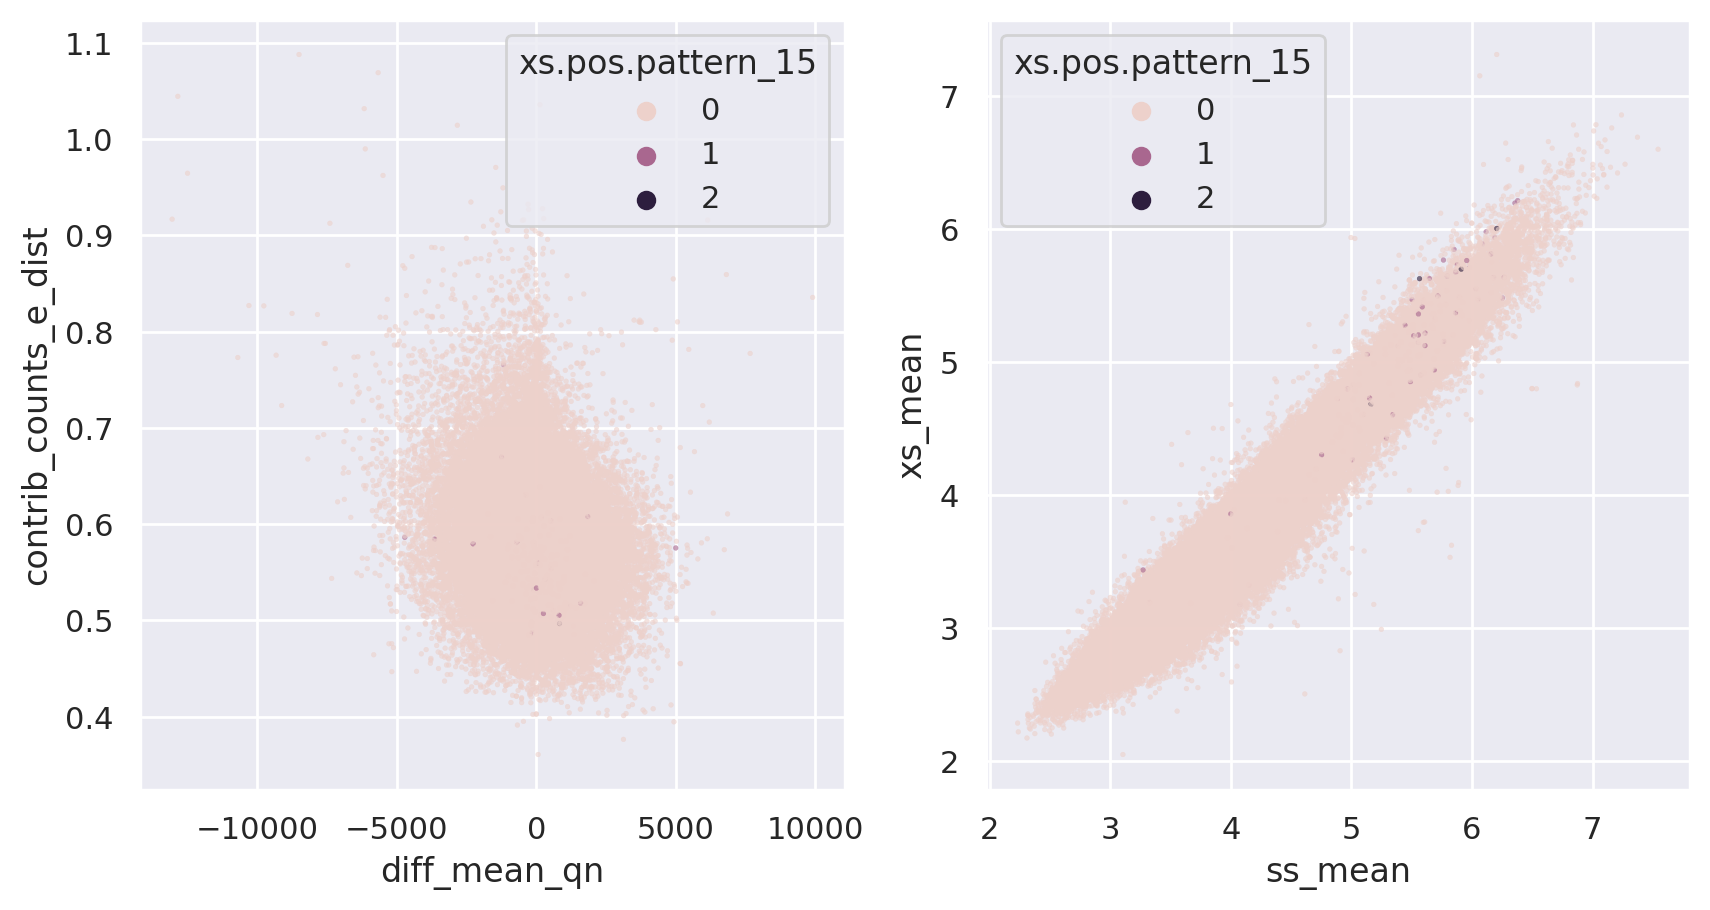

In [11]:
plot_pattern("xs.pos.pattern_15")


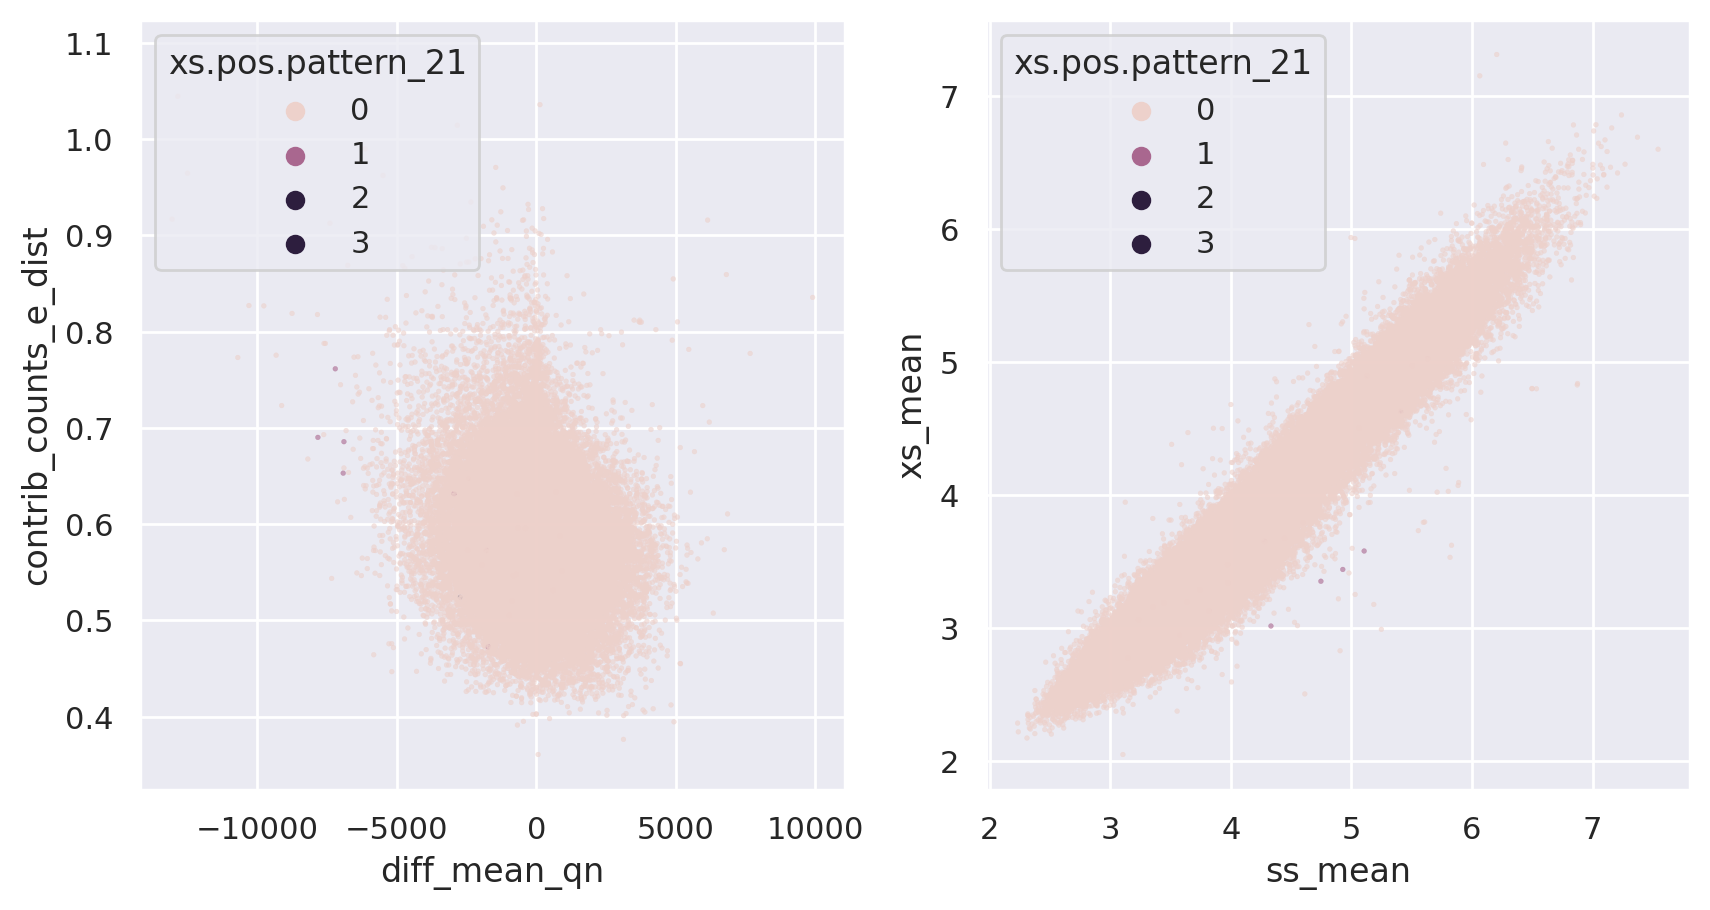

In [12]:
plot_pattern("xs.pos.pattern_21")


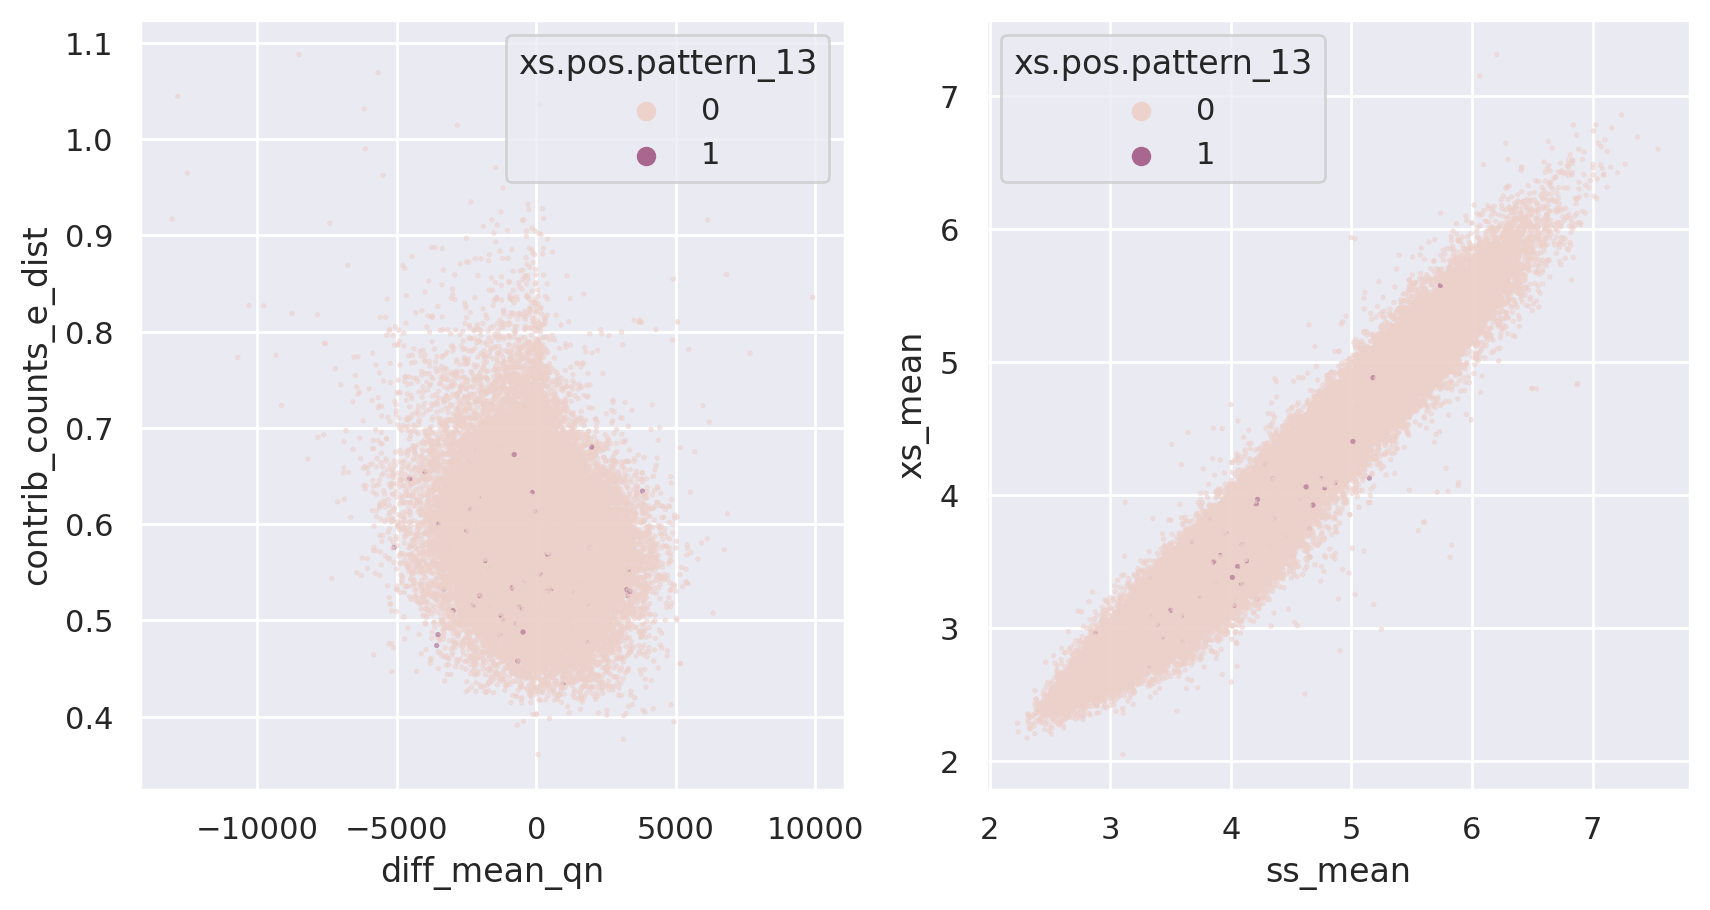

In [13]:
plot_pattern("xs.pos.pattern_13")



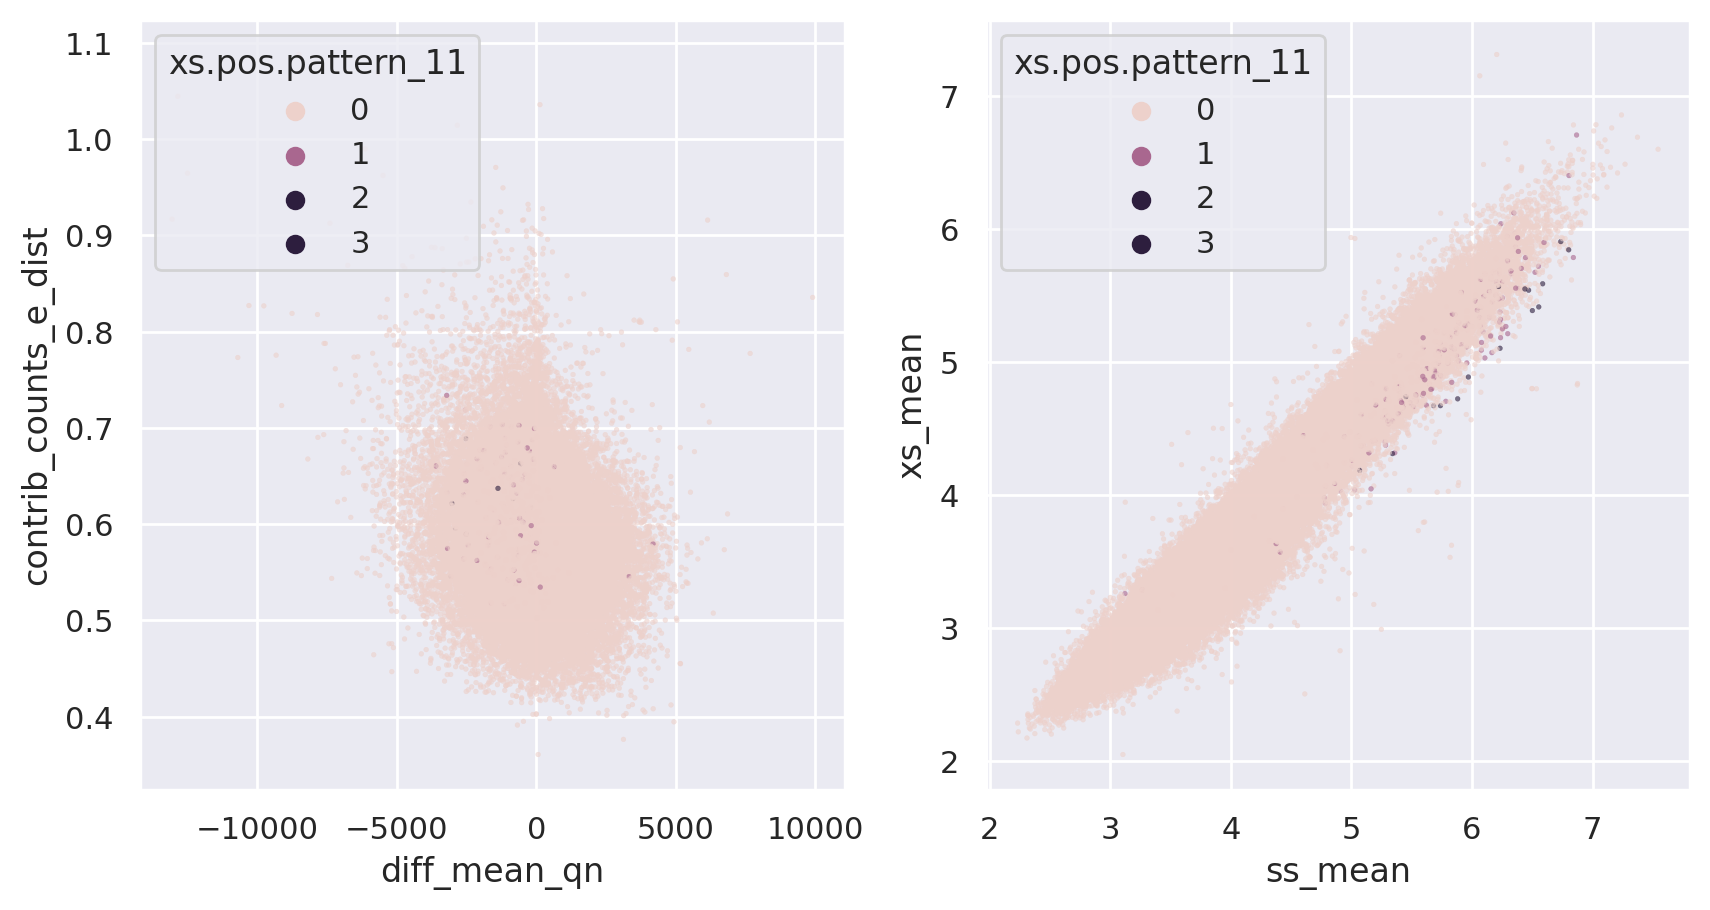

In [14]:
plot_pattern("xs.pos.pattern_11")


ValueError: Could not interpret value `ss.neg.pattern_0` for parameter `hue`

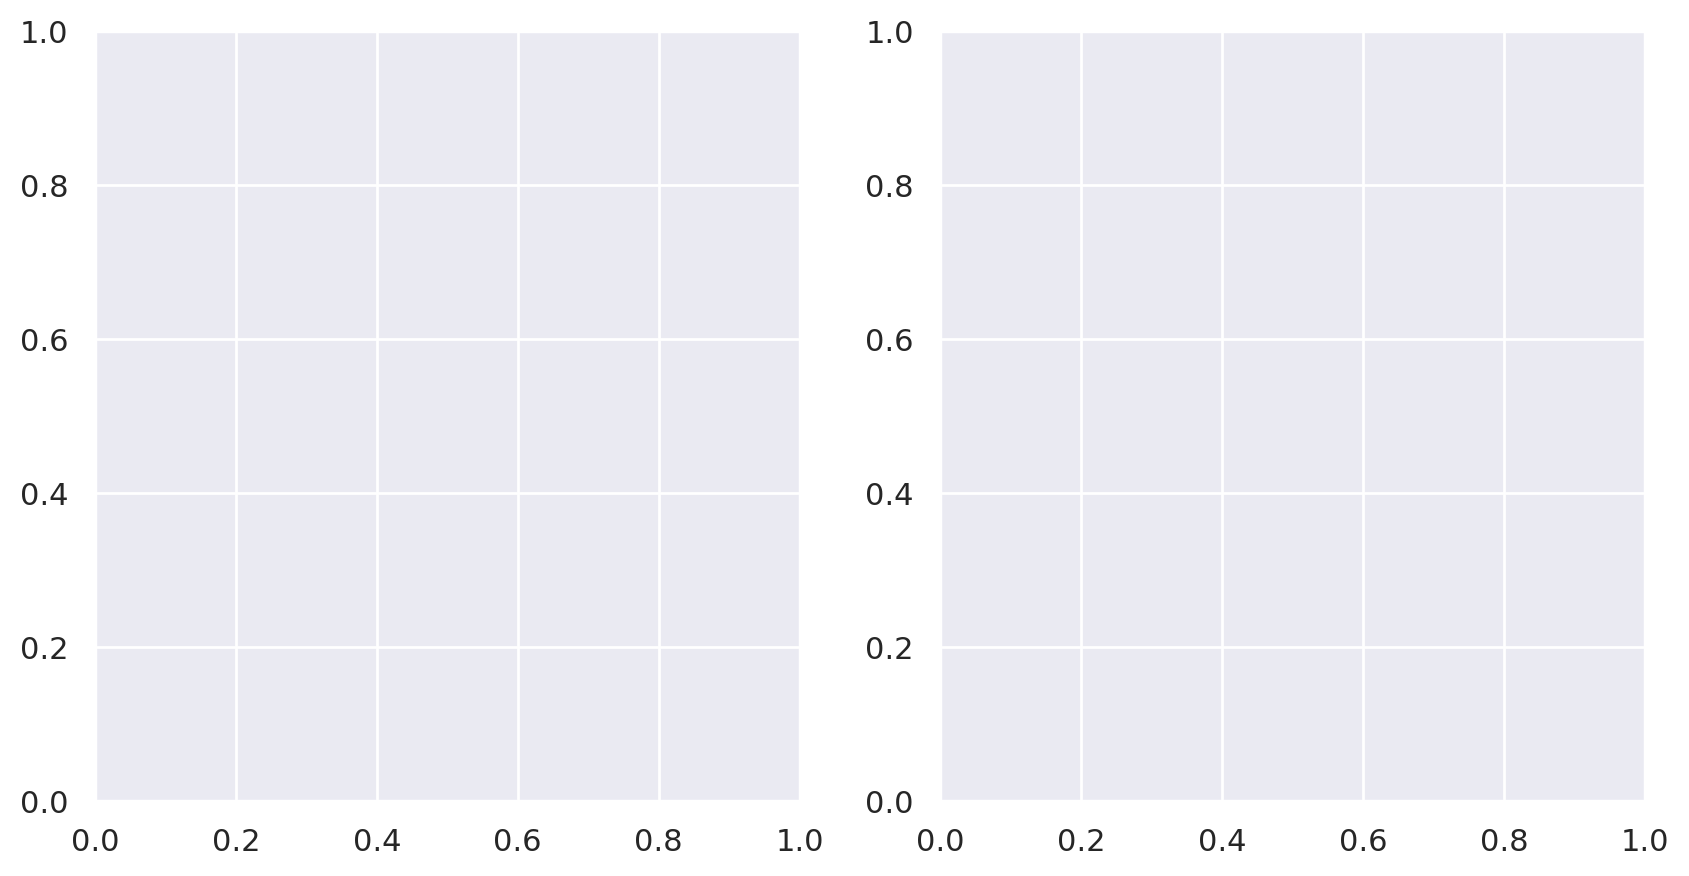

In [15]:
plot_pattern("ss.neg.pattern_0")
